# PARTE 4

A partir de 4 señales distintas (Voz Hombre, Voz Mujer, Suma senoidal, Chirp), se utiliza filtraje y se devuelven los gráficos en el dominio del tiempo y de la frecuencia de las señales originales y las filtradas. 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile as wav
import IPython.display as ipd
import fftplot2

23074.7155726234


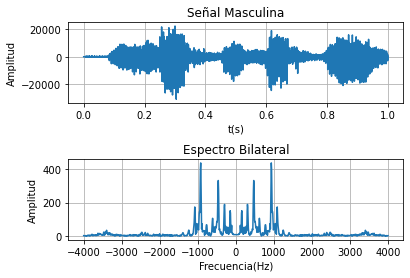

In [25]:
# Primero Leemos la señal de voz masculina
fs, masc = wav.read('VozHombre.wav');

# Se calcula el vector de tiempo
ts = np.size(masc)/fs;  # Duración de la señal
t = np.arange(0, ts, 1/fs);

# Cálculo del espectro bilateral

#f = np.fft.fftfreq(len(masc),1/fs) # Eje frecuencial
#MASC = abs(np.fft.fft(masc)) #Magnitud
#MASC = MASC / max(MASC) * max(max(masc),abs(min(masc))) #Se normaliza 

fig, (ax1, ax2) = plt.subplots(2,1); plt.subplots_adjust(hspace=0.7)
ax1.plot(t,masc)
ax1.set_xlabel('t(s)'), ax1.set_ylabel('Amplitud'), ax1.set_title('Señal Masculina')
ax1.grid()

graficar_fft(masc, fs, ax2,N=1024,title='Espectro Bilateral')

ax2.set_xlabel('Frecuencia(Hz)'), ax2.set_ylabel('Amplitud')
ax2.grid()

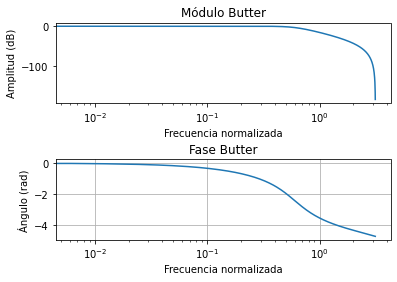

In [26]:
# Se procede a filtrar la señal. Se utilizará un filtro butter pasabajos con
# fcorte 750 Hz
fc = 750
wc = fc / (0.5 * fs) # Frecuencia de corte normalizada por fmuestreo/2
b1, a1 = signal.butter(3,wc,'low')

f1, h1 = signal.freqz(b1,a1) # Obtención de la respuesta en frecuencia del filtro
H1 = 20 * np.log10(abs(h1))

# Obtención de la fase del filtro
Fase_butt = np.unwrap(np.angle(h1)) # Se utiliza unwrap para evitar saltos de fase
                                    # mayores a 2 * pi
plt.subplots(2,1,sharex=True), plt.subplots_adjust(hspace=0.7)
plt.subplot(2,1,1), plt.semilogx(f1, H1)
plt.title('Módulo Butter')
plt.xlabel('Frecuencia normalizada'); plt.ylabel('Amplitud (dB)')
plt.subplot(2,1,2), plt.semilogx(f1,Fase_butt)
plt.title('Fase Butter'), plt.xlabel('Frecuencia normalizada'), plt.ylabel('Ángulo (rad)')
plt.grid()
plt.show()

In [27]:
# Para obtener la respuesta al impulso del filtro debe diseñarse una función.
# Consiste en filtrar un impulso, o sea, un array del tipo [1 0 0 0 ...] dado que
# h(t) convo delta(t) = h(t)
# Fuente: http://pyageng.mpastell.com/book/dsp.html

def plot_impz(b, a = 1, l=100):
    if type(a)== int: #FIR
        l = len(b)
    #else: # IIR
        #l = 500
    impulse = np.repeat(0.,l); impulse[0] =1.
    x = np.arange(0,l)
    response = signal.lfilter(b, a, impulse)
    plt.plot(x, response)
    plt.ylabel('Amplitud')
    plt.xlabel('n (muestras)')
    plt.title('Respuesta al Impulso')

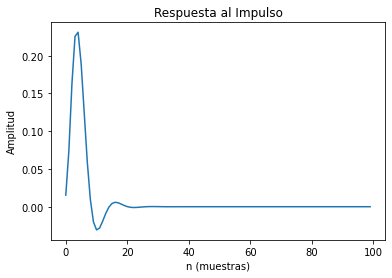

In [28]:
plot_impz(b1,a1) # Respuesta impulsiva del filtro Butter

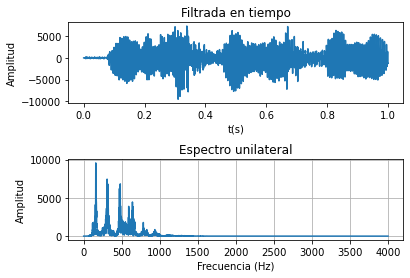

In [29]:
# Se filtra la señal
masc_filt = signal.filtfilt(b1,a1,masc)

# Se guarda la señal en un archivo wav
# masc_filt = masc_filt.astype(np.int16)
# wav.write('VozHombre_filt.wav',fs,masc_filt)

# Se calcula la transformada de la señal filtrada
ffilt = np.fft.rfftfreq(len(masc_filt), 1/fs);
MASC_filt = abs(np.fft.rfft(masc_filt));
MASC_filt = MASC_filt / max(MASC_filt) * max(max(masc_filt),abs(min(masc_filt)));

plt.subplots(2,1), plt.subplots_adjust(hspace=0.7)
plt.subplot(2,1,1), plt.plot(t, masc_filt)
plt.xlabel('t(s)'), plt.ylabel('Amplitud'), plt.title('Filtrada en tiempo')
plt.subplot(2,1,2), plt.plot(ffilt, MASC_filt)
plt.xlabel('Frecuencia (Hz)'), plt.ylabel('Amplitud'), plt.title('Espectro unilateral')
plt.grid()
plt.show()


In [30]:
# Reproducir la señal original
ipd.Audio(masc, rate=fs)

In [31]:
# Reproducir la señal filtrada
ipd.Audio(masc_filt, rate=fs)

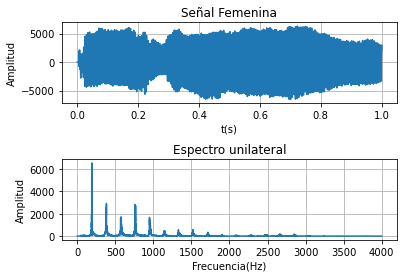

In [32]:
# Se realiza el mismo procedimiento con la señal de voz femenina
fs, fem = wav.read('VozMujer.wav')
ts = np.size(fem) / fs
t = np.linspace(0, ts, np.size(fem))

# Obtencion de la transformada de fourier de la señal
f = np.fft.rfftfreq(len(fem), 1/fs);
FEM = abs(np.fft.rfft(fem));
FEM = FEM / max(FEM) * max(max(fem),abs(min(fem)));

plt.subplots(2,1), plt.subplots_adjust(hspace=0.7)
plt.subplot(2,1,1), plt.plot(t,fem)
plt.xlabel('t(s)'), plt.ylabel('Amplitud'), plt.title('Señal Femenina')
plt.grid()
plt.subplot(2,1,2), plt.plot(f,FEM)
plt.xlabel('Frecuencia(Hz)'), plt.ylabel('Amplitud'), plt.title('Espectro unilateral')
plt.grid()


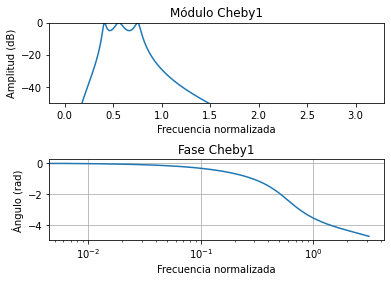

In [33]:
# Se crea un filtro Cheby1 pasabanda
fl = 500
fh = 1000
wn = [fl / (0.5 * fs), fh / (0.5 * fs)]

b2, a2 = signal.cheby1(3, 5, wn, 'bandpass') # Se obtienen los coeficientes de transferencia

f2, h2 = signal.freqz(b2,a2)
H2 = 20 * np.log10(abs(h2))
Fase_cheby1 = np.unwrap(np.angle(h1))

plt.subplots(2,1,sharex=True), plt.subplots_adjust(hspace=0.7)
plt.subplot(2,1,1), plt.plot(f2,H2)
plt.title('Módulo Cheby1')
plt.ylim((-50,0))
plt.xlabel('Frecuencia normalizada'); plt.ylabel('Amplitud (dB)')
plt.subplot(2,1,2), plt.semilogx(f2,Fase_cheby1)
plt.title('Fase Cheby1'), plt.xlabel('Frecuencia normalizada'), plt.ylabel('Ángulo (rad)')
plt.grid()
plt.show()


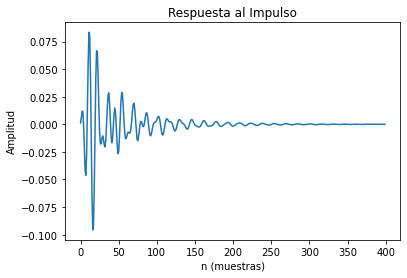

In [34]:
# Se obtiene la respuesta impulsiva del filtro
plot_impz(b2,a2,l=400)

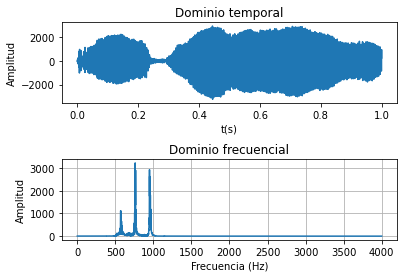

In [35]:
# Se filtra la señal de voz femenina:
fem_filt = signal.filtfilt(b2,a2,fem)

# Se guarda la señal en un archivo wav
# fem_filt = fem_filt.astype(np.int16)
# wav.write('VozMujer_filt.wav',fs,fem_filt)

# Se calcula la transformada de la señal filtrada
ffilt = np.fft.rfftfreq(len(fem_filt), 1/fs);
FEM_filt = abs(np.fft.rfft(fem_filt));
FEM_filt = FEM_filt / max(FEM_filt) * max(max(fem_filt),abs(min(fem_filt)));

plt.subplots(2,1), plt.subplots_adjust(hspace=0.7)
plt.subplot(2,1,1), plt.plot(t, fem_filt)
plt.xlabel('t(s)'), plt.ylabel('Amplitud'), plt.title('Dominio temporal')
plt.subplot(2,1,2), plt.plot(ffilt, FEM_filt)
plt.xlabel('Frecuencia (Hz)'), plt.ylabel('Amplitud'), plt.title('Dominio frecuencial')
plt.grid()
plt.show()

In [36]:
# Reproducir la señal original
ipd.Audio(fem, rate=fs)

In [37]:
# Reproducir la señal filtrada
ipd.Audio(fem_filt, rate=fs)

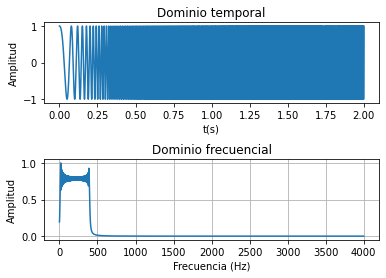

In [38]:
# Se crea un chirp para ser procesado y filtrado
fs = 8000; ti = 0; ts = 2
t = np.arange(ti, ts + 1/fs, 1/fs)
chirp = signal.chirp(t, 5, ts, 400)

# Se obtiene la transformada de Fourier de la señal
f = np.fft.rfftfreq(len(chirp), 1/fs);
CHIRP = abs(np.fft.rfft(chirp));
CHIRP = CHIRP / max(CHIRP) * max(max(chirp),abs(min(chirp)));

plt.subplots(2,1), plt.subplots_adjust(hspace=0.7)
plt.subplot(2,1,1), plt.plot(t, chirp)
plt.xlabel('t(s)'), plt.ylabel('Amplitud'), plt.title('Dominio temporal')
plt.subplot(2,1,2), plt.plot(f, CHIRP)
plt.xlabel('Frecuencia (Hz)'), plt.ylabel('Amplitud'), plt.title('Dominio frecuencial')
plt.grid()
plt.show()

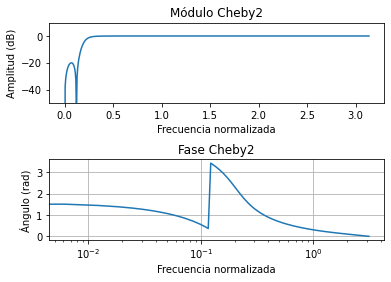

In [39]:
# Se crea un filtro Cheby2 pasaaltos
fc = 180
wn = fc / (0.5 * fs)
b3, a3 = signal.cheby2(3,20,wn,'high')

f3, h3 = signal.freqz(b3,a3)
H3 = 20 * np.log10(abs(h3))

Fase_cheby2 = np.unwrap(np.angle(h3))

plt.subplots(2,1,sharex=True), plt.subplots_adjust(hspace=0.7)
plt.subplot(2,1,1), plt.plot(f3,H3)
plt.title('Módulo Cheby2')
plt.ylim((-50,10))
plt.xlabel('Frecuencia normalizada'); plt.ylabel('Amplitud (dB)')
plt.subplot(2,1,2), plt.semilogx(f3,Fase_cheby2)
plt.title('Fase Cheby2'), plt.xlabel('Frecuencia normalizada'), plt.ylabel('Ángulo (rad)')
plt.grid()
plt.show()

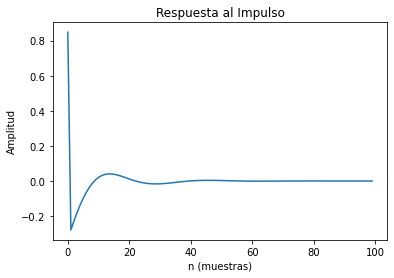

In [40]:
plot_impz(b3,a3)

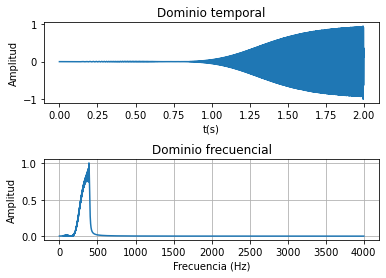

In [41]:
# Se filtra la señal
chirp_filt = signal.filtfilt(b3,a3, chirp)

# Se guarda la señal en un archivo wav
# chirp_filt = chirp_filt.astype(np.int16)
# wav.write('chirp_filt.wav',fs,chirp_filt)

# Se calcula la transformada de la señal filtrada
ffilt = np.fft.rfftfreq(len(chirp_filt), 1/fs)
CHIRP_filt = abs(np.fft.rfft(chirp_filt))
CHIRP_filt = CHIRP_filt / max(CHIRP_filt) * max(max(chirp_filt),abs(min(chirp_filt)))

plt.subplots(2,1), plt.subplots_adjust(hspace=0.7)
plt.subplot(2,1,1), plt.plot(t, chirp_filt)
plt.xlabel('t(s)'), plt.ylabel('Amplitud'), plt.title('Dominio temporal')
plt.subplot(2,1,2), plt.plot(ffilt, CHIRP_filt)
plt.xlabel('Frecuencia (Hz)'), plt.ylabel('Amplitud'), plt.title('Dominio frecuencial')
plt.grid()
plt.show()

In [42]:
# Reproducir la señal original
ipd.Audio(chirp, rate=fs)

In [43]:
# Reproducir la señal filtrada
ipd.Audio(chirp_filt, rate=fs)

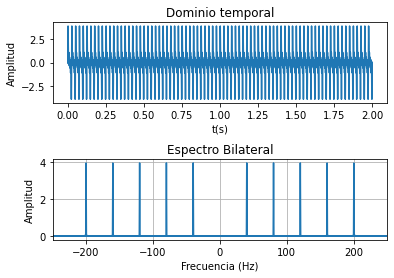

In [44]:
# Se genera una suma de 5 sinusoides
f1 = fs / 200 # Se define la fundamental
x1 = np.sin(2 * np.pi * f1 * t)
x2 = np.sin(2 * np.pi * 2 * f1 * t)
x3 = np.sin(2 * np.pi * 3 * f1 * t)
x4 = np.sin(2 * np.pi * 4 * f1 * t)
x5 = np.sin(2 * np.pi * 5 * f1 * t)
x = x1 + x2 + x3 + x4 + x5

# Se obtiene su transformada
f = np.fft.fftfreq(len(x), 1/fs);
X = abs(np.fft.fft(x));
X = X / max(X) * max(max(x),abs(min(x)));

plt.subplots(2,1), plt.subplots_adjust(hspace=0.7)
plt.subplot(2,1,1), plt.plot(t, x)
plt.xlabel('t(s)'), plt.ylabel('Amplitud'), plt.title('Dominio temporal')
plt.subplot(2,1,2), plt.plot(f, X), plt.xlim((-250,250))
plt.xlabel('Frecuencia (Hz)'), plt.ylabel('Amplitud'), plt.title('Espectro Bilateral')
plt.grid()
plt.show()

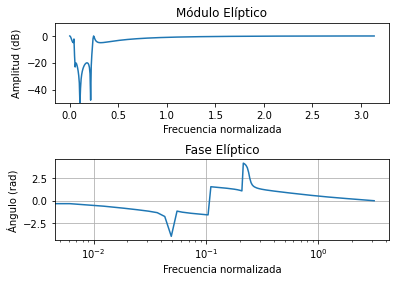

In [45]:
# Se crea un filtro elíptico rechazabanda para rescatar la fundamental
fl = 60
fh = 300
wn = [fl / (0.5 * fs), fh / (0.5 * fs)]

b4, a4 = signal.ellip(3,5,20,wn,'stop') # Coeficientes de transferencia

f4, h4 = signal.freqz(b4,a4)
H4 = 20 * np.log10(abs(h4))

Fase_ellip = np.unwrap(np.angle(h4))

plt.subplots(2,1), plt.subplots_adjust(hspace=0.7)
plt.subplot(2,1,1), plt.plot(f4,H4)
plt.title('Módulo Elíptico')
plt.ylim((-50,10))
plt.xlabel('Frecuencia normalizada'); plt.ylabel('Amplitud (dB)')
plt.subplot(2,1,2), plt.semilogx(f4,Fase_ellip)
plt.title('Fase Elíptico'), plt.xlabel('Frecuencia normalizada'), plt.ylabel('Ángulo (rad)')
plt.grid()
plt.show()

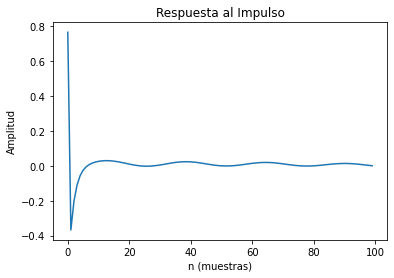

In [46]:
plot_impz(b4,a4)

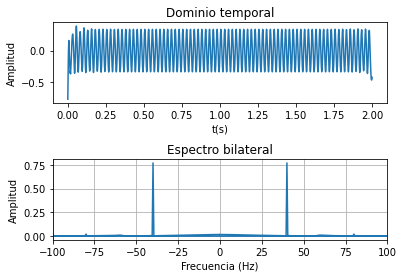

In [47]:
# Se filtra la suma senoidal para recuperar la fundamental
x_filt = signal.filtfilt(b4,a4,x)

# Se guarda la señal en un archivo wav
# x_filt = x_filt.astype(np.int16)
# wav.write('x_filt.wav',fs,x_filt)

# Se calcula la transformada de la señal filtrada
ffilt = np.fft.fftfreq(len(x_filt), 1/fs)
X_filt = abs(np.fft.fft(x_filt))
X_filt = X_filt / max(X_filt) * max(max(x_filt),abs(min(x_filt)))

plt.subplots(2,1), plt.subplots_adjust(hspace=0.7)
plt.subplot(2,1,1), plt.plot(t, x_filt)
plt.xlabel('t(s)'), plt.ylabel('Amplitud'), plt.title('Dominio temporal')
plt.subplot(2,1,2), plt.plot(ffilt, X_filt), plt.xlim((-100,100))
plt.xlabel('Frecuencia (Hz)'), plt.ylabel('Amplitud'), plt.title('Espectro bilateral')
plt.grid()
plt.show()

In [48]:
# Reproducir la señal original
ipd.Audio(x, rate=fs)

In [49]:
# Reproducir la señal filtrada
ipd.Audio(x_filt, rate=fs) # No se aprecia por tratarse de f = 40 Hz